Anomalies detected by Isolation Forest: 1000
Anomalies detected by LOF: 1000
Confirmed anomalies by both: 236


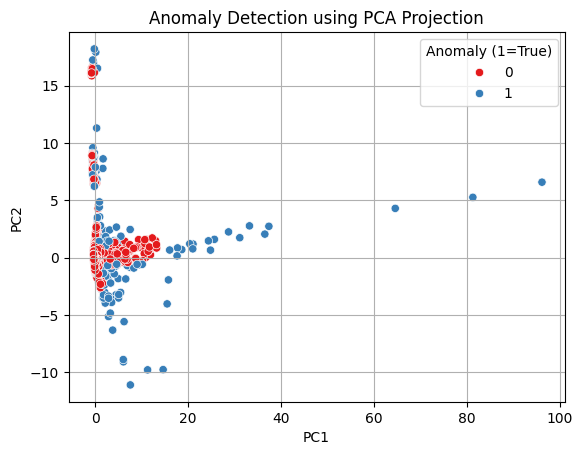

In [21]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv(r"/content/merged_csv_output.csv")

# Step 1: Select relevant numerical features
features = [
    "amountInUSD", "amountOutUSD", "gasLimit", "gasPrice", "blockNumber",
    "tokenIn/lastPriceUSD", "tokenOut/lastPriceUSD"
]

df_clean = df[features].dropna()

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Optional: Reduce dimensions for visualization/performance
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Fit Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df_clean["IF_anomaly"] = iso_forest.fit_predict(X_pca)  # -1 = anomaly, 1 = normal

# Step 4: Fit Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df_clean["LOF_anomaly"] = lof.fit_predict(X_pca)  # -1 = anomaly, 1 = normal

# Step 5: Compare results
df_clean["anomaly_combined"] = (
    (df_clean["IF_anomaly"] == -1) & (df_clean["LOF_anomaly"] == -1)
).astype(int)  # 1 = anomaly by both

# Summary of anomalies
print("Anomalies detected by Isolation Forest:", (df_clean["IF_anomaly"] == -1).sum())
print("Anomalies detected by LOF:", (df_clean["LOF_anomaly"] == -1).sum())
print("Confirmed anomalies by both:", df_clean["anomaly_combined"].sum())

# Optional: Save anomalies
df_anomalies = df[df_clean["anomaly_combined"] == 1]
df_anomalies.to_csv("confirmed_anomalies.csv", index=False)

# Optional: Visualization (PCA components)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_clean["anomaly_combined"], palette="Set1")
plt.title("Anomaly Detection using PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Anomaly (1=True)")
plt.grid(True)
plt.show()


In [22]:
df

,amountIn,amountInUSD,amountOut,amountOutUSD,gasLimit,gasPrice,gasUsed,hash,id,blockNumber,timestamp,tokenIn/id,tokenIn/name,tokenIn/lastPriceUSD,tokenIn/lastPriceBlockNumber,tokenOut/id,tokenOut/lastPriceBlockNumber,tokenOut/lastPriceUSD,tokenOut/name
0,408826725662547349,1388.895351,1385916905,1385.916905,400000,2606055903,NaN,0x00000323f570e300be5b5bb8f76bda42410580aa949c...,0x00000323f570e300be5b5bb8f76bda42410580aa949c...,20203219,1719735035,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,1791.71693,22208621,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,22208621,1.000000,USD Coin
1,256138906533134336,636.167884,637864791,637.864791,2059408,6664873944,NaN,0x00000373a7dcfd7a82b10f91f5540f0f2ef780b14034...,0x00000373a7dcfd7a82b10f91f5540f0f2ef780b14034...,21925703,1740514955,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,1791.71693,22208621,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,22208621,1.000000,USD Coin
2,491999037653889280,1221.969715,1226684164,1226.684164,2059408,6664873944,NaN,0x00000373a7dcfd7a82b10f91f5540f0f2ef780b14034...,0x00000373a7dcfd7a82b10f91f5540f0f2ef780b14034...,21925703,1740514955,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,1791.71693,22208621,0xdac17f958d2ee523a2206206994597c13d831ec7,22208621,1.000000,Tether USD
3,5417318564,5417.318564,1937372398837165393,5412.307951,210797,833157581,NaN,0x000007c5ecf972de579662a7653cccb17c493b1c62c0...,0x000007c5ecf972de579662a7653cccb17c493b1c62c0...,21910139,1740327155,0xdac17f958d2ee523a2206206994597c13d831ec7,Tether USD,1.00000,22208621,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,22208621,1791.716930,Wrapped Ether
4,111183867267427276460,111.362873,111306251,111.306251,825485,13442552917,NaN,0x0000085ae55b268f9965e5d4a9cec6aa80d3ab0941e8...,0x0000085ae55b268f9965e5d4a9cec6aa80d3ab0941e8...,21364742,1733744843,0x73a15fed60bf67631dc6cd7bc5b6e8da8190acf5,Usual USD,0.99845,22196045,0xdac17f958d2ee523a2206206994597c13d831ec7,22208621,1.000000,Tether USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4607650452,4607.650452,4606616995,4606.616995,640987,8700816640,NaN,0x035590350600b1c7a9fc6cf642307df30942089084bb...,0x035590350600b1c7a9fc6cf642307df30942089084bb...,20952345,1728770195,0xdac17f958d2ee523a2206206994597c13d831ec7,Tether USD,1.00000,22208673,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,22208673,1.000000,USD Coin
19996,238611409142794755,664.926063,266807315674263715840,661.167051,329010,893954565,NaN,0x0355949ea2bed5ca7182852aaeaf0baa2a79547c6e8f...,0x0355949ea2bed5ca7182852aaeaf0baa2a79547c6e8f...,21903500,1740246983,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,1791.87981,22208673,0x152649ea73beab28c5b49b26eb48f7ead6d4c898,22208679,1.758203,PancakeSwap Token
19997,5818066,5.818066,3519827108337471,5.815155,368232,13119409730,NaN,0x03559f97a8dc7f5e01bbfd43437a5a646763f631ce67...,0x03559f97a8dc7f5e01bbfd43437a5a646763f631ce67...,17994652,1693002095,0xdac17f958d2ee523a2206206994597c13d831ec7,Tether USD,1.00000,22208673,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,22208673,1791.879810,Wrapped Ether
19998,109670000000000000,385.350629,385154767,385.154767,557415,14789385374,NaN,0x0355aa515194ee935e1f9cba64a2eb9148ae5e527458...,0x0355aa515194ee935e1f9cba64a2eb9148ae5e527458...,19635904,1712881151,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,1791.87981,22208673,0xdac17f958d2ee523a2206206994597c13d831ec7,22208673,1.000000,Tether USD


In [ ]:
df.columns

Index(['amountIn', 'amountInUSD', 'amountOut', 'amountOutUSD', 'gasLimit',
       'gasPrice', 'gasUsed', 'hash', 'id', 'blockNumber', 'timestamp',
       'tokenIn/id', 'tokenIn/name', 'tokenIn/lastPriceUSD',
       'tokenIn/lastPriceBlockNumber', 'tokenOut/id',
       'tokenOut/lastPriceBlockNumber', 'tokenOut/lastPriceUSD',
       'tokenOut/name'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load your data
# df = pd.read_csv('your_defi_data.csv')

# Select numeric features for clustering
features = ['amountInUSD', 'amountOutUSD', 'gasLimit', 'gasPrice']
X = df[features]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
k =  3  # you can test for different k values
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Calculate silhouette score
score = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score for k={k}: {score:.4f}")


Silhouette Score for k=3: 0.9201


In [ ]:
df['gasPrice']

,gasPrice
0,2606055903
1,6664873944
2,6664873944
3,833157581
4,13442552917
...,...
19995,8700816640
19996,893954565
19997,13119409730
19998,14789385374


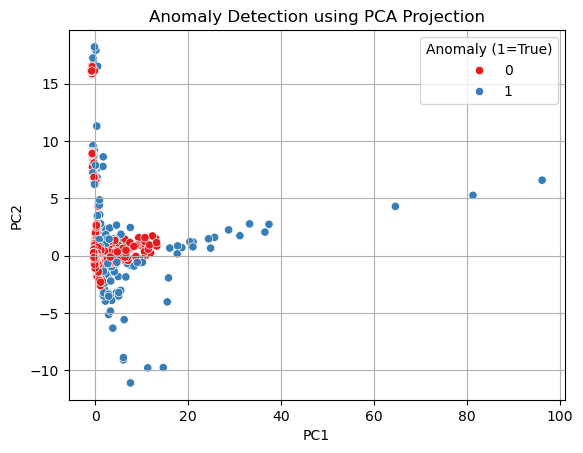

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_pca and df_clean["anomaly_combined"] exist
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_clean["anomaly_combined"], palette="Set1")
plt.title("Anomaly Detection using PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Anomaly (1=True)")
plt.grid(True)
plt.show()


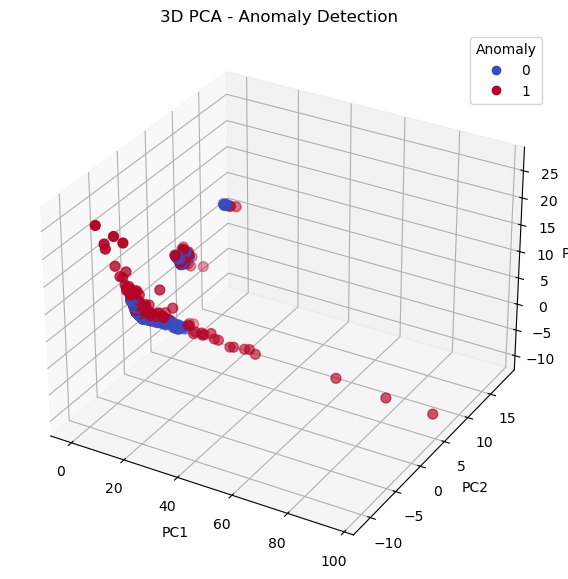

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
    c=df_clean["anomaly_combined"], cmap="coolwarm", s=50
)
ax.set_title("3D PCA - Anomaly Detection")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend(*scatter.legend_elements(), title="Anomaly")
plt.show()


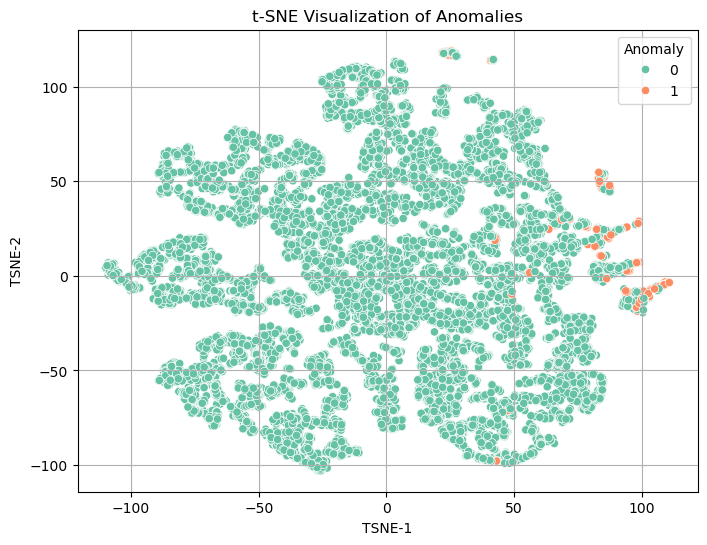

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df_clean["anomaly_combined"], palette="Set2")
plt.title("t-SNE Visualization of Anomalies")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.legend(title="Anomaly")
plt.grid(True)
plt.show()


     ---------------------------------------- 0.0/40.8 kB ? eta -:--:--
     ---------- ----------------------------- 10.2/40.8 kB ? eta -:--:--
     ---------- ----------------------------- 10.2/40.8 kB ? eta -:--:--
     ------------------- ------------------ 20.5/40.8 kB 108.9 kB/s eta 0:00:01
     ------------------- ------------------ 20.5/40.8 kB 108.9 kB/s eta 0:00:01
     -------------------------------------- 40.8/40.8 kB 139.6 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib_venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45439 sha256=ac0d20447a6f67f39aac95e7236eecf922dae080827e424e28f04f760a2c25ea
  Stored in directory: c:\users\gourish\appd

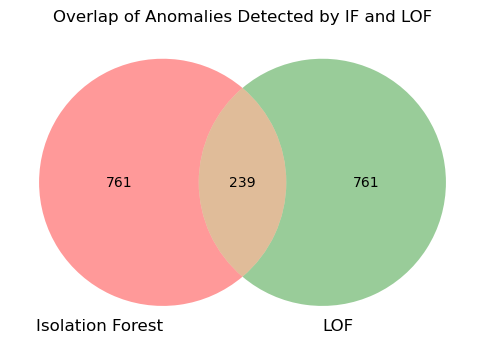

In [ ]:
!pip install matplotlib_venn
from matplotlib_venn import venn2

# Get sets of indices for anomalies
iso_anomalies = set(df_clean[df_clean["IF_anomaly"] == -1].index)
lof_anomalies = set(df_clean[df_clean["LOF_anomaly"] == -1].index)

# Plot Venn Diagram
plt.figure(figsize=(6, 6))
venn2([iso_anomalies, lof_anomalies], set_labels=("Isolation Forest", "LOF"))
plt.title("Overlap of Anomalies Detected by IF and LOF")
plt.show()


In [ ]:
# Index the anomalies by row number (or use unique identifier if available like transaction hash)
iso_anomalies = df_clean[df_clean["IF_anomaly"] == -1]
lof_anomalies = df_clean[df_clean["LOF_anomaly"] == -1]

# Get indices (or if you have 'id' or 'hash', use that instead)
iso_indices = set(iso_anomalies.index)
lof_indices = set(lof_anomalies.index)

# Compare sets
overlap_indices = iso_indices & lof_indices
only_iso = iso_indices - lof_indices
only_lof = lof_indices - iso_indices

# Print summary
print(f"Total IF anomalies: {len(iso_indices)}")
print(f"Total LOF anomalies: {len(lof_indices)}")
print(f"Overlapping anomalies (both IF and LOF): {len(overlap_indices)}")
print(f"Only IF anomalies: {len(only_iso)}")
print(f"Only LOF anomalies: {len(only_lof)}")

# Optional: Save these separately for inspection
df_clean.loc[only_iso].to_csv("only_isolation_forest_anomalies.csv", index=False)
df_clean.loc[only_lof].to_csv("only_lof_anomalies.csv", index=False)
df_clean.loc[overlap_indices].to_csv("common_anomalies.csv", index=False)


In [ ]:
df.nunique()

amountIn                         18346
amountInUSD                      18926
amountOut                        19946
amountOutUSD                     19458
gasLimit                         15843
gasPrice                         18607
gasUsed                              0
hash                             18783
id                               20000
blockNumber                      18705
timestamp                        18705
tokenIn/id                         113
tokenIn/name                       113
tokenIn/lastPriceUSD                37
tokenIn/lastPriceBlockNumber       115
tokenOut/id                        113
tokenOut/lastPriceBlockNumber      114
tokenOut/lastPriceUSD               36
tokenOut/name                      113
dtype: int64

In [ ]:
confirmed_anomalies = df_clean[df_clean["anomaly_combined"] == 1]


In [ ]:
normal_data = df_clean[df_clean["anomaly_combined"] == 0]

# Mean comparison
anomaly_means = confirmed_anomalies[features].mean()
normal_means = normal_data[features].mean()
diff = anomaly_means - normal_means

metrics_df = pd.DataFrame({
    "Anomaly_Mean": anomaly_means,
    "Normal_Mean": normal_means,
    "Difference": diff
})
print(metrics_df.sort_values(by="Difference", key=abs, ascending=False))


              Anomaly_Mean   Normal_Mean    Difference
gasPrice      2.710640e+11  1.826778e+10  2.527962e+11
gasLimit      2.654147e+06  6.471408e+05  2.007006e+06
amountInUSD   2.149512e+05  1.028145e+04  2.046697e+05
amountOutUSD  2.130471e+05  1.026957e+04  2.027775e+05


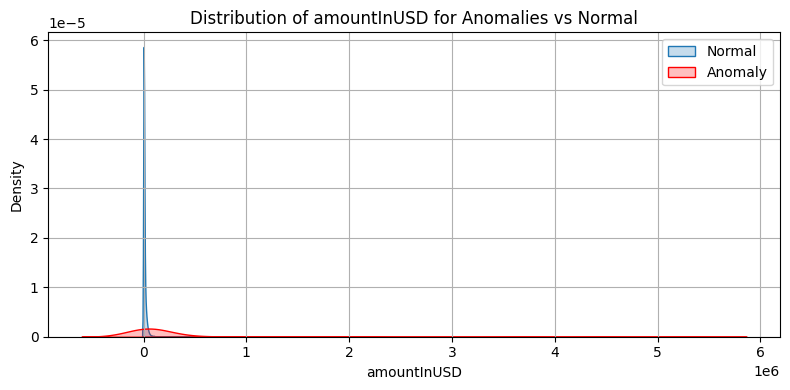

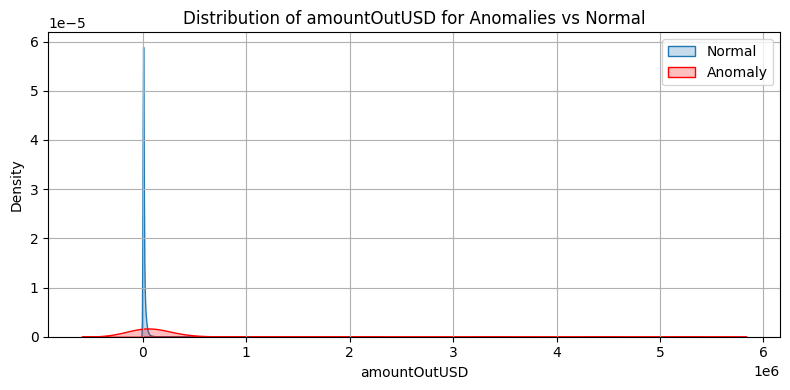

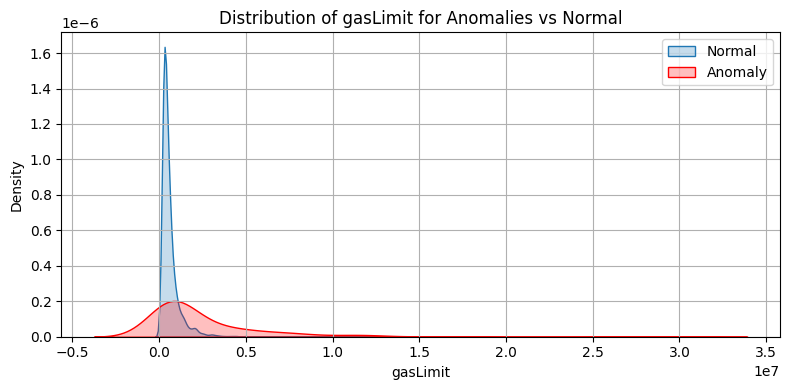

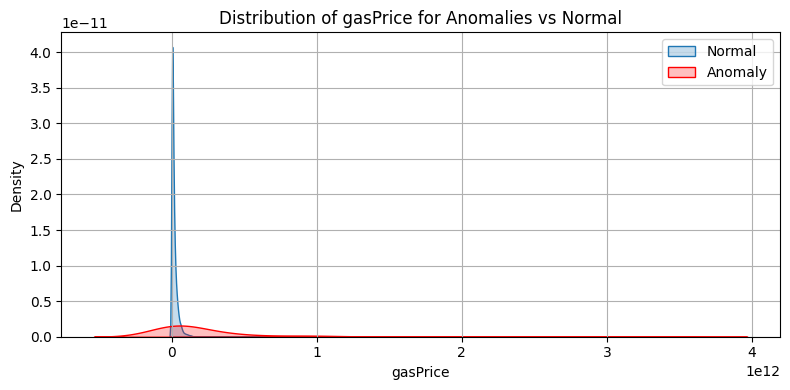

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=normal_data[col], label='Normal', fill=True)
    sns.kdeplot(data=confirmed_anomalies[col], label='Anomaly', fill=True, color='red')
    plt.title(f"Distribution of {col} for Anomalies vs Normal")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
